<h1 align='center'> Survival Prediction of Titanic</h1>


This notebook is created by Gopinath K S on how to deal on Titanic Dataset on a beginer's view     <br>
Any Queires, contact me anywhere!                                                            <br>
kaggle Id -@gopinath15                                                                       <br>
linkedin Id -www.linkedin.com/in/gopinath-k-s-98a48a1b3                                      <br>

***
_Importing the nessesary libraries_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Reading the files  train and test from the directory

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

A view of the Data and its properties

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('shape of training data',train_df.shape)
print('shape of test data',test_df.shape)

shape of training data (891, 12)
shape of test data (418, 11)


In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df.info() #ticket

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***
<h3> <font color='fluoroscent'>Concating test and train </font></h3>
  <font color='grey'>  The two dataframes are concatenated to a single data frame ,so that every change that is made on training data is also applied on test data. this saves time to apply the same code on test data. </font><br> <br<
Note : - Everytime while changing the data,we must do it with 'df' DataFrame,while analyzing the data,we must use 'train_df' DataFrame

In [10]:
train_df_without_survival=train_df.drop('Survived',axis=1)
df=pd.concat([train_df_without_survival,test_df],ignore_index=True)
df.shape

(1309, 11)

In [11]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3> Finding on the missing values -</h3>

_Missing values in a dataset implies it is a untidy data. those mising values can destroy the modelling and force into decreased accuracy. So the missing data need to be replaced._

  - the rows or columns containing the missing values can be droped , but we may miss some valuable information from the droped columns.
      
  - the missing data can be filled with average, median values of the column,or use any other methods to fill the missing values.
    

In [12]:
#missing values
print(train_df.isnull().sum())
print("-"*20)
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Droping the 'Cabin' Column

Since the Cabin Column consists of a large number of null values, it can be droped as it could not provide any valid information.

In [13]:
df.drop('Cabin',axis=1,inplace=True)
df.shape[1]

10

columns containing minimum null values like 'Fare' ,'Embarked' can be filled with average if its numerical or with most reccuring if it is Categorical.

In [14]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [15]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
df['Embarked'].fillna('S',inplace=True)
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### Calculating the Missing Values
- missing values can be filled with average,median,mode of the columns
- taking the most reccurring variable and filling in the missing columns
- considering the other most corelated features to the missing feature and the choosing the missing value.

Third method will be more sophesticated.<br>
The most corelated features to 'Age' are "Sex' ,'Embarked','Pclass' .<br>
while adding 'Embarked' standard deviation of age for every 'Sex' and 'Pclass' increases, so 'Embarked is not added.

In [17]:
df[['Age','Sex','Pclass','Embarked']].groupby(['Sex','Pclass','Embarked']).agg(['std','median'])

Age       
                              std median
Sex    Pclass Embarked                  
female 1      C         12.935082  38.00
              Q          2.828427  35.00
              S         15.701476  35.00
       2      C          9.739330  23.00
              Q               NaN  30.00
              S         13.012269  28.00
       3      C         12.859400  15.00
              Q          7.423499  22.00
              S         12.597733  22.00
male   1      C         14.738778  39.00
              Q               NaN  44.00
              S         14.588262  42.00
       2      C          9.545102  29.00
              Q         12.685293  59.00
              S         13.839498  29.00
       3      C          9.695540  24.25
              Q         17.597314  25.00
              S         11.417386  25.00

Lower the Standard Deviation , the more accurate the filled value will be.<br>
So every missing 'Age' will be filled with the median according to the row's 'Sex' and 'Pclass'


In [18]:
#to calculate the missing value of age
df[['Age','Sex','Pclass']].groupby(['Sex','Pclass']).agg(['std','median'])

Age       
                     std median
Sex    Pclass                  
female 1       14.272460   36.0
       2       12.911747   28.0
       3       12.205254   22.0
male   1       14.578529   42.0
       2       13.977400   29.5
       3       11.682415   25.0

This loop finds the 'Sex' and 'Pclass' of every missing 'Age' row and fills accordingly

In [19]:
grouped=df[['Age','Sex','Pclass']].groupby(['Sex','Pclass']).median()


for i in df[df['Age'].isnull()].index:
    loop_sex=df.loc[i,'Sex']
    loop_pclass=df.loc[i,'Pclass']
    corr_of_pclass=grouped.loc[str(loop_sex),:]
    approx_age=corr_of_pclass.loc[int(loop_pclass),:]
    df.loc[i,'Age']=float(approx_age)
df['Age'].isnull().sum()

0

****
### Correlating Features of the dataset to find the best and worst Features
#### Corelating Categorical Features
_While dealing with Categorical Features, if the Survival rate between several Categories significantly differ,then the Feature imporves our model!_

Correlating Age with Survived Column


In [20]:
#checking the freatures of the dataset by corelating with target
cor_pclass=train_df[['Pclass','Survived']].groupby('Pclass').mean()
cor_pclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:ylabel='Pclass'>

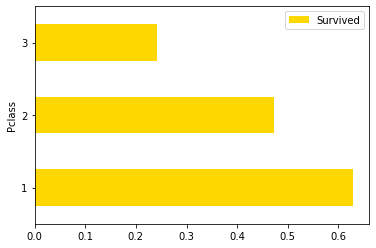

In [21]:
cor_pclass.plot(kind='barh',color='gold')

_Corelating Sex with Survived Column_

In [22]:
corr_sex=train_df[['Sex','Survived']].groupby('Sex').mean()
corr_sex

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:ylabel='Sex'>

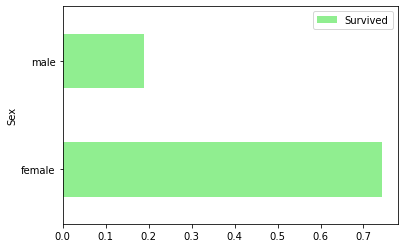

In [23]:
corr_sex.plot(kind='barh',color='lightgreen')

_Corelating Embarked with Survived Column_

In [24]:
corr_embarked=train_df[['Embarked','Survived']].groupby('Embarked').mean()
corr_embarked

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:ylabel='Embarked'>

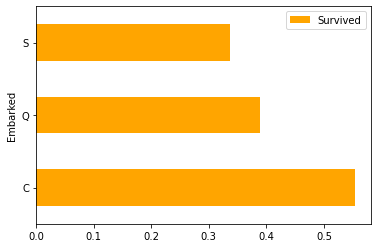

In [25]:
corr_embarked.plot(kind='barh',color='orange')

#### Corelating Continuous Features with Survived Column
<br>

Note :   The corr() Function finds the linear Corelation between features and target. whenever the Corelation  coeffecient is near to 1,the feature has a strong positive correlation eith Target , and whenever it is near -1 it shows strong negative Correlation. If correlation is near zero, there is no or weak Correlation.


In [26]:
 #to find the relation between several continuous features and target variable
cont_columns=['Age','SibSp','Parch','Fare']
corelation_df=train_df[cont_columns+['Survived']]
corelation_df.corr()['Survived']
#none of the features provide a significant corelation 

Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

The above Features show only weak correlations, showing these features are not best for modeling.<br>Therefore Feature Engineering has to be done to improve these features 

***
## Feature Engineering

if Continuous Features do not provide much Corelation, continuous features can be converted to a categorical feature,to provide better Correlation.<br><br><br>
Hear I have split the Age Feature to 8 Categories (purely be Trial and Error Method) so that the several categories significantly differ in rate of survival.<br>
Note : - I have mixed the 2nd and 3th categories to a single category(as it provides same Survival Rates),mixed 4th to 6th to a single category and mixed 7th and 8th (as they are similar), leaving 1st category to achieve 4 categories 
  - kids less than 10  - [high rate of survival]
  - Teen and young adults - [medium rate of survival]
  - adults - [moderate rate of survival]
  - senior citizens - [low rate of survival] <br>
Note : - we should also look at the number of passengers in every category as count thereby avoiding stuck by survival rates

In [27]:


#turning out age to a categorical variable
train_df['Age_Categ']=pd.cut(train_df['Age'],8)
train_df[['Age_Categ','Survived']].groupby('Age_Categ').agg(['sum','count','mean'])

Survived                
                      sum count      mean
Age_Categ                                
(0.34, 10.368]         38    64  0.593750
(10.368, 20.315]       44   115  0.382609
(20.315, 30.263]       84   230  0.365217
(30.263, 40.21]        69   155  0.445161
(40.21, 50.158]        33    86  0.383721
(50.158, 60.105]       17    42  0.404762
(60.105, 70.052]        4    17  0.235294
(70.052, 80.0]          1     5  0.200000

In [28]:
df['Age_Categ']=pd.cut(df['Age'],8)
df1=df['Age_Categ'].astype('str')
df['Age_Categ']=df1.map({'(0.0902, 10.149]': 1,
        '(10.149, 20.128]': 2,
        '(20.128, 30.106]': 2,
        '(30.106, 40.085]': 3,
        '(40.085, 50.064]': 3,
        '(50.064, 60.043]': 3,
        '(60.043, 70.021]': 4,
        '(70.021, 80.0]': 4}).astype('category')
train_df['age_categ']=df.loc[:891,'Age_Categ']

In [29]:
df['Age_Categ']

0       2
1       3
2       2
3       3
4       3
       ..
1304    2
1305    3
1306    3
1307    2
1308    2
Name: Age_Categ, Length: 1309, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [30]:
corr_age=train_df[['age_categ','Survived']].groupby('age_categ').mean()
corr_age

,Survived
age_categ,
1,0.593750
2,0.337398
3,0.424920
4,0.227273


<AxesSubplot:xlabel='age_categ'>

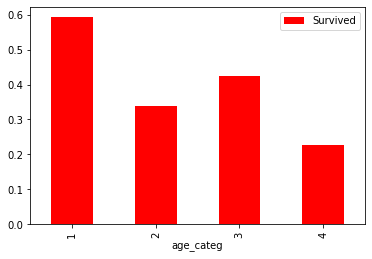

In [62]:
corr_age.plot(kind='bar',color='r')

 With the help of 'Name' Feature ,we can create a new Feature the Title of the passenger which may increase the survival rate of a passenger

In [31]:
#getting title from names
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In these lines of code I have Extracted the title of the passenger which comes after a space character and ends before a fullstop character.

In [32]:
title=df[['Name','Ticket']].set_index('Name')
for i in title.index:
    rev=str(i)[::-1]
    tit=rev[rev.index('.')+1:rev[rev.index('.'):].index(' ')+rev.index('.')]
    tit=tit[::-1]
    title.loc[i,'Ticket']=tit
title.reset_index(inplace=True)
df['Title']=title['Ticket']

In [33]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         196
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Lady          1
Sir           1
Mme           1
Countess      1
L             1
Jonkheer      1
Don           1
Dona          1
Capt          1
Name: Title, dtype: int64

Replacing the Rare titles into a single category

In [34]:
df['Title'].replace(['Dr','Rev','Col','Major','Ms','Mlle','Lady','Sir','Mme','Countess','L',
                     'Jonkheer','Don','Dona','Capt'],'other',inplace=True)

In [35]:
train_df['Title']=df.loc[:891,'Title']
train_df[['Title','Survived']].groupby('Title').agg(['mean','count'])

Survived      
            mean count
Title                 
Master  0.575000    40
Miss    0.697802   182
Mr      0.156673   517
Mrs     0.790323   124
other   0.464286    28

<AxesSubplot:xlabel='Title'>

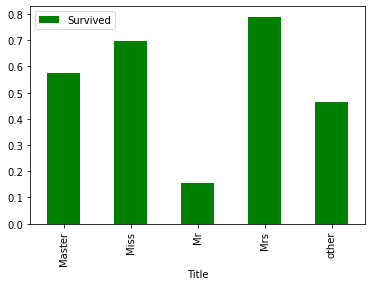

In [64]:
corr_title=train_df[['Title','Survived']].groupby('Title').mean()
corr_title.plot(kind='bar',color='green')

'Title' can be considered as a Good Feature as the survival rates among several Categories differ notably.
Converting each category to a numerical for modeling

In [37]:
df['Title']=df['Title'].map({'Master':1,
                'Miss':2,
                'Mr':3,
                'Mrs':4,
                'other':5})

Using Family size of a passenger instead of Parch or Sipsp to improve the Correlation.
It is more logical, if a person has a family in Titanic,he has more Chance of Survival.

In [38]:
#using parch and sibsp to find whether the person is single or not
df['Family_Size']=df[['Parch','SibSp']].sum(axis=1)
train_df['Family_Size']=df.loc[:891,'Family_Size']
train_df[['Family_Size','Survived']].groupby('Family_Size').agg(['count','mean'])

Survived          
               count      mean
Family_Size                   
0                537  0.303538
1                161  0.552795
2                102  0.578431
3                 29  0.724138
4                 15  0.200000
5                 22  0.136364
6                 12  0.333333
7                  6  0.000000
10                 7  0.000000

Creating a new feature Single which denotes a person is single or not in Titanic

In [39]:
def singleornot(famsize):
    if famsize==0:
        return 1
    else:
        return 0
df['Single']=df['Family_Size'].apply(singleornot)
train_df['Single']=df.loc[:891,'Single']
train_df[['Single','Survived']].groupby('Single').agg(['mean','count'])

Survived      
            mean count
Single                
0       0.505650   354
1       0.303538   537

<AxesSubplot:xlabel='Single'>

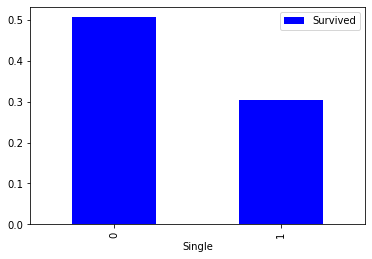

In [68]:
corr_single=train_df[['Single','Survived']].groupby('Single').mean()
corr_single.plot(kind='bar',color='blue')

***
### Converting Fare to a Categorical Feature
First I have Converted Fare to 20 Categories(by trial and Error) to get significantly differable survival rates and then joined similar Categories to finally make 3 Categories:
  - paid less than 25 - [low survival rate]
  - paid 25 to 75 - [medium survival rate]
  - paid greater than 75 - [very high survival rate]<br>
As expected Highly paid Passengers had more chance of Survival

In [41]:
df['Fare_Categ']=pd.cut(df['Fare'],20)
train_df['Fare_Categ']=df.loc[:891,'Fare_Categ']
train_df[['Fare_Categ','Survived']].groupby('Fare_Categ').agg(['mean','count'])

Survived      
                        mean count
Fare_Categ                        
(-0.512, 25.616]    0.284698   562
(25.616, 51.233]    0.429412   170
(51.233, 76.849]    0.597015    67
(76.849, 102.466]   0.769231    39
(102.466, 128.082]  0.733333    15
(128.082, 153.699]  0.750000    16
(153.699, 179.315]  1.000000     2
(179.315, 204.932]       NaN     0
(204.932, 230.548]  0.666667     9
(230.548, 256.165]  0.500000     2
(256.165, 281.781]  0.666667     6
(281.781, 307.398]       NaN     0
(307.398, 333.014]       NaN     0
(333.014, 358.63]        NaN     0
(358.63, 384.247]        NaN     0
(384.247, 409.863]       NaN     0
(409.863, 435.48]        NaN     0
(435.48, 461.096]        NaN     0
(461.096, 486.713]       NaN     0
(486.713, 512.329]  1.000000     3

Converting categories to Numericals

In [42]:
df['Fare_Categ']=df['Fare_Categ'].astype(str).map({'(-0.512, 25.616]':1,
                                 '(25.616, 51.233]':2,
                                 '(51.233, 76.849]':2,
                                 '(76.849, 102.466]':3,
                                 '(102.466, 128.082]':3,
                                 '(128.082, 153.699]':3,
                                 '(153.699, 179.315]':3,
                                 '(179.315, 204.932]':3,
                                 '(204.932, 230.548]':3,
                                 '(230.548, 256.165]':3,
                                 '(256.165, 281.781]':3,
                                 '(281.781, 307.398]':3,
                                 '(307.398, 333.014]':3,
                                 '(333.014, 358.63]':3,
                                 '(358.63, 384.247]':3,
                                 '(384.247, 409.863]':3,
                                 '(409.863, 435.48]':3,
                                 '(435.48, 461.096]':3,
                                 '(461.096, 486.713]':3,
                                 '(486.713, 512.329]':3})


In [43]:
train_df['Fare_Categ']=df.loc[:891,'Fare_Categ']
train_df[['Fare_Categ','Survived']].groupby('Fare_Categ').agg(['count','mean'])

Survived          
              count      mean
Fare_Categ                   
1               562  0.284698
2               237  0.476793
3                92  0.750000

<AxesSubplot:xlabel='Fare_Categ'>

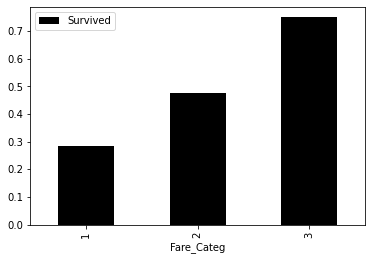

In [69]:
corr_fare=train_df[['Fare_Categ','Survived']].groupby('Fare_Categ').mean()
corr_fare.plot(kind='bar',color='black')

### Droping Ticket as it does not provide any relation to survival

In [45]:
#ticket
df.drop('Ticket',axis=1,inplace=True)

### Converting other Categoricals to numerical values for modeling

In [46]:
#changing the categoricals sex and embarked to numericals 
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [47]:
df['Embarked']=df['Embarked'].map({'C':1,'Q':2,'S':3})

### Removing all features other than nessesary (Feature Engineered) Features
again spliting up into training and testing data and adding 'Survived' Column to the training data 

In [48]:
#droping the unwanted features

df.drop(['PassengerId','Name','Age','SibSp','Parch','Fare','Family_Size'],axis=1,inplace=True)

In [49]:
final_testing_df=df[891:]
final_training_x=df[:891]
final_training_y=train_df.loc[:891,'Survived']
final_training_df=pd.concat([df[:891],train_df['Survived']],axis=1)

In [50]:
final_training_df

,Pclass,Sex,Embarked,Age_Categ,Title,Single,Fare_Categ,Survived
0,3,0,3,2,3,0,1,0
1,1,1,1,3,4,0,2,1
2,3,1,3,2,2,1,1,1
3,1,1,3,3,4,0,2,1
4,3,0,3,3,3,1,1,0
...,...,...,...,...,...,...,...,...
886,2,0,3,2,5,1,1,0
887,1,1,3,2,2,1,2,1
888,3,1,3,2,2,0,1,0
889,1,0,1,2,3,1,2,1


***
<h2 align='center'>Modeling</h2>


_Splitting the data into Training and testing data ,whose accuracy will help to improve the model._

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(final_training_x,final_training_y,test_size=0.3)


Classification can be done using several models :
   - Logistic Regression
   - Decision Tree Classifier
   - Random Forest Classifier
   - K Neighbors Classifier
   - Naive Bayes Classifier 
   - Support Vector Machines
   - Gradient Descent Classifier

In [52]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
log_yhat=log_model.predict(x_test)
log_acc=accuracy_score(log_yhat,y_test)
print('accuracy score',log_acc)

accuracy score 0.7910447761194029


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(max_depth=5)
tree_model.fit(x_train,y_train)
tree_yhat=tree_model.predict(x_test)
tree_acc=accuracy_score(tree_yhat,y_test)
print('accuracy score',tree_acc)

accuracy score 0.8544776119402985


In [54]:
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier(n_estimators=100,max_depth=5)
forest_model.fit(x_train,y_train)
forest_yhat=forest_model.predict(x_test)
forest_acc=accuracy_score(forest_yhat,y_test)
print('accuracy score',forest_acc)




accuracy score 0.8432835820895522


In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train,y_train)
knn_yhat=knn_model.predict(x_test)
knn_acc=accuracy_score(knn_yhat,y_test)
print('accuracy score',knn_acc)

accuracy score 0.8171641791044776


In [56]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()
naive_model.fit(x_train,y_train)
naive_yhat=naive_model.predict(x_test)
naive_acc=accuracy_score(naive_yhat,y_test)
print('accuracy score',naive_acc)

accuracy score 0.7873134328358209


In [57]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)
svc_yhat=svc_model.predict(x_test)
svc_acc=accuracy_score(svc_yhat,y_test)
print('accuracy score',svc_acc)

accuracy score 0.835820895522388


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
#scochastic gradient descent
from sklearn.linear_model import SGDClassifier
sgd_model=SGDClassifier()
sgd_model.fit(x_train,y_train)
sgd_yhat=sgd_model.predict(x_test)
sgd_acc=accuracy_score(sgd_yhat,y_test)
print('accuracy score',sgd_acc)

accuracy score 0.7985074626865671


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### Accuracy of Several Algorithms

In [59]:
best_algorithm=pd.DataFrame({'algorithm':['LogisticRegression','DecisionTree','RandomForest','KNeighbors',
                                          'GaussianNB','svm','SGD'],
                             'accuracy':[log_acc,tree_acc,forest_acc,knn_acc,naive_acc,svc_acc,sgd_acc]})
best_algorithm

,algorithm,accuracy
0,LogisticRegression,0.791045
1,DecisionTree,0.854478
2,RandomForest,0.843284
3,KNeighbors,0.817164
4,GaussianNB,0.787313
5,svm,0.835821
6,SGD,0.798507


Decision Tree and Random Forest are the highest accuracy models,
I have Selected Random Forest [parameters are tuned on Trial and error Basis]

In [60]:
#decision tree is best to classify the dataset
model=RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(final_training_x,final_training_y)
prediction=model.predict(final_testing_df)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,


***
### Converting the solution to a csv file

In [61]:
final_df=pd.DataFrame({'PassengerId':final_testing_df.index +1,'Survived':prediction},index=None)

final_df.set_index('PassengerId',inplace=True)
final_df.to_csv('titanic_subknn.csv')

***
<h1 align ='center'>Thank You </h1>